# Dados de 1.USA.gov do Bitly

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pandas import Series, DataFrame

In [65]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [66]:
# converção de de uma string json em um objeto dicionário
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

- Contando fusos horários para descobrindo os fusos horários que ocorrem com mais frequência no conjunto de dados

In [67]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [68]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [69]:
#Descobrindo os fusos horários
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [70]:
#Contando a frequência dos fusos horários
tz_count = frame['tz'].value_counts()
tz_count[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [71]:
# Substituindo os valores ausentes e usando uma indexação booleana de array 
# para as string vazias
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknow'
tz_count = clean_tz.value_counts()
tz_count[:12]

tz
America/New_York       1251
Unknow                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Europe/Berlin            28
Name: count, dtype: int64

- Plotagem dos resultados

<AxesSubplot: ylabel='tz'>

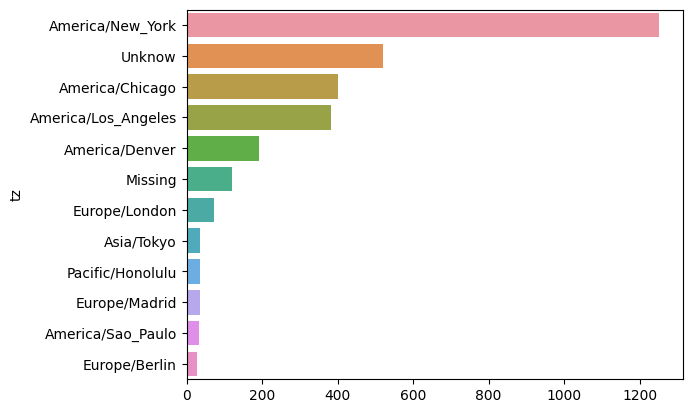

In [72]:
subset = tz_count[:12]
sns.barplot(y=subset.index, x=subset.values)

- Descobrindo infomações sobre o navegador, dispositivo ou aplicação

In [73]:
frame['a'][:20]

0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                GoogleMaps/RochesterNY
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6     Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7     Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8     Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                  NaN
14    Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16    Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17    Mozilla/5.0 (Macintosh; Intel Mac OS X 10.

In [74]:
print(frame['a'][1])
print(frame['a'][50])
print(frame['a'][51][:50])

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9


In [75]:
# Realizando o parse de todas as informações
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [76]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
BlackBerry8520/5.0.0.592                                3
Dalvik/1.4.0                                            3
Goldfire                                                2
Acoon                                                   2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
sometrik.com                                            1
Vodafone/1.0/LG-KU990i/V10c                             1
BlackBerry8530/5.0.0.654                                1
Vancouver     

In [77]:
# Decompondo os principais fusos horários em usúarios de Windows e 
# usuários que não utilizam Windows

cframe = frame[frame.a.notnull()].copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os'].head(10)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
8    Not Windows
9        Windows
Name: os, dtype: object

In [78]:
# Agrupando os dados de acordo com a coluna de fusos horários e com
# a lista de sistemas operacionais
by_tz_os = cframe.groupby(['tz', 'os'])
agg_count = by_tz_os.size().unstack().fillna(0)
agg_count

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [79]:
# Selecionando os principais fusos horários 
indexer = agg_count.sum(1).argsort() 
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [80]:
# Selecionando os maiores valores
count_subset = agg_count.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [81]:
agg_count.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [82]:
# Reogarzinando os dados para a plotagem

count_subset = count_subset.stack()
count_subset.name = 'Total'
count_subset = count_subset.reset_index()
count_subset

,tz,os,Total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot: xlabel='Total', ylabel='tz'>

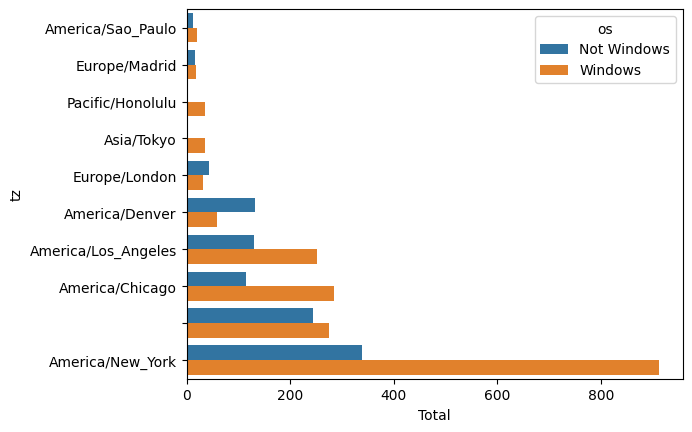

In [83]:
sns.barplot(x='Total', y='tz', hue='os', data=count_subset)

<AxesSubplot: xlabel='results', ylabel='tz'>

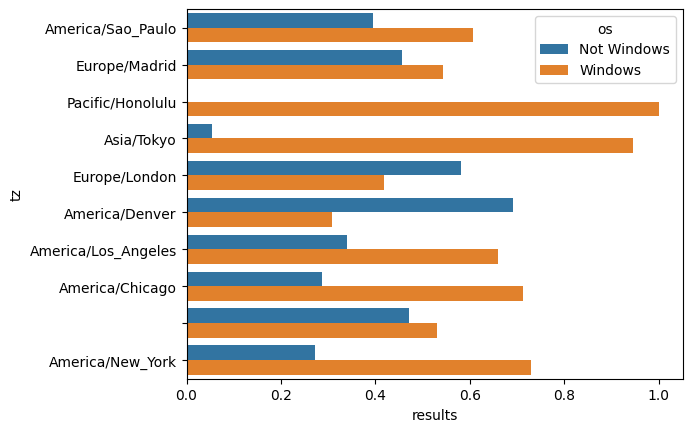

In [104]:
# Amplinado o gráfico para melhor visualização de usuários Windows 
# nos grupo menores
g = count_subset.groupby('tz')
results = count_subset.Total / g.Total.transform('sum')
sns.barplot(x='results', y='tz', hue='os', data=count_subset)